<a href="https://colab.research.google.com/github/mutedspeaker/Mininet-Optical/blob/main/machineLearning_mininetOptical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ch      gOSNR       OSNR
0   9  26.316215  27.925369
1  18  26.309184  27.915188
2  27  26.302164  27.905031
3  36  26.295156  27.894897
4  45  26.288158  27.884788


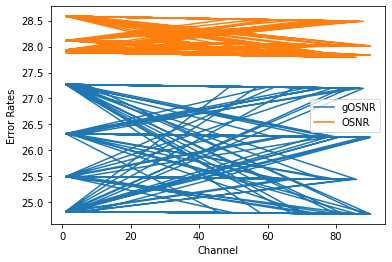

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("data.csv")

# Print the first few rows of the data
print(data.head())

# Plot the data
plt.plot(data["ch"], data["gOSNR"], label="gOSNR")
plt.plot(data["ch"], data["OSNR"], label="OSNR")
plt.xlabel("Channel")
plt.ylabel("Error Rates")
plt.legend()
plt.show()


Linear Regression MSE for gOSNR error rate: 0.901077523167809
Linear Regression MSE for OSNR error rate: 0.07859505934815195
Neural Network MSE for gOSNR error rate: 0.930594188314303
Neural Network MSE for OSNR error rate: 0.08365203089321915


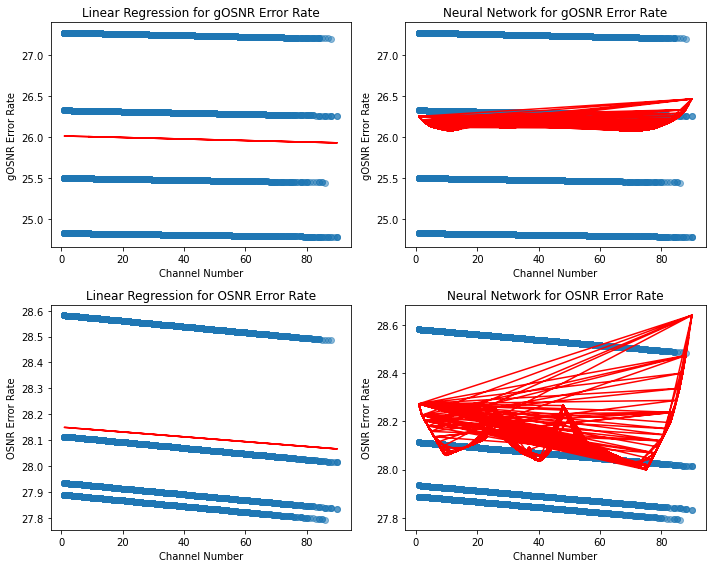

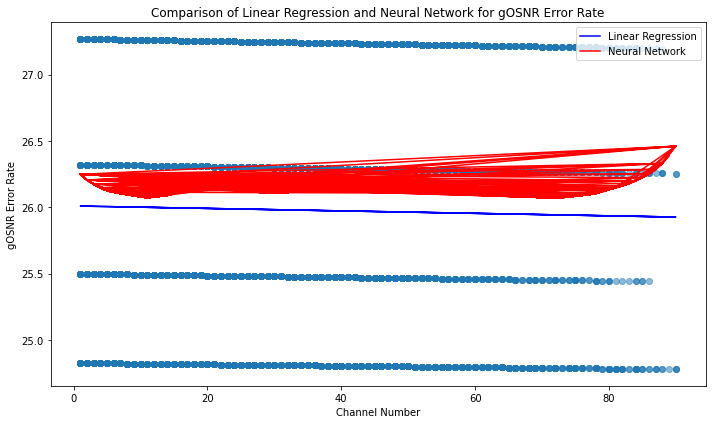

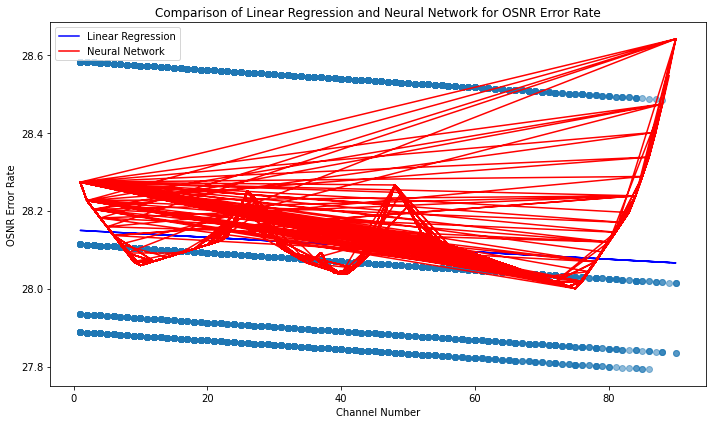

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
df = pd.read_csv("data.csv")

# Separate the input features (channel number) and 
# output variables (gOSNR and OSNR error rates)
X = df["ch"].values.reshape(-1, 1)
y1 = df["gOSNR"].values
y2 = df["OSNR"].values

# Train a linear regression model to predict gOSNR error rates
model1 = LinearRegression()
model1.fit(X, y1)

# Train a linear regression model to predict OSNR error rates
model2 = LinearRegression()
model2.fit(X, y2)

# Train a neural network model to predict gOSNR error rates
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model3 = MLPRegressor(hidden_layer_sizes=(200, 100, 50, 25),
max_iter=1500,alpha=0.00001,solver='adam', random_state=42)
model3.fit(X_scaled, y1)

# Train a neural network model to predict OSNR error rates
model4 = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1500, alpha=0.0001,
                      solver='adam', random_state=42)
model4.fit(X_scaled, y2)

# Evaluate the models using mean squared error
y1_pred1 = model1.predict(X)
y2_pred1 = model2.predict(X)
y1_pred3 = model3.predict(X_scaled)
y2_pred3 = model4.predict(X_scaled)

mse1 = mean_squared_error(y1, y1_pred1)
mse2 = mean_squared_error(y2, y2_pred1)
mse3 = mean_squared_error(y1, y1_pred3)
mse4 = mean_squared_error(y2, y2_pred3)

print("Linear Regression MSE for gOSNR error rate:", mse1)
print("Linear Regression MSE for OSNR error rate:", mse2)
print("Neural Network MSE for gOSNR error rate:", mse3)
print("Neural Network MSE for OSNR error rate:", mse4)

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot of input and output variables with linear regression line for gOSNR
axs[0, 0].scatter(X, y1, alpha=0.5)
axs[0, 0].plot(X, y1_pred1, color='red')
axs[0, 0].set_xlabel("Channel Number")
axs[0, 0].set_ylabel("gOSNR Error Rate")
axs[0, 0].set_title("Linear Regression for gOSNR Error Rate")

# Scatter plot of input and output variables with neural network regression line for gOSNR
axs[0, 1].scatter(X, y1, alpha=0.5)
axs[0, 1].plot(X, y1_pred3, color='red')
axs[0, 1].set_xlabel("Channel Number")
axs[0, 1].set_ylabel("gOSNR Error Rate")
axs[0, 1].set_title("Neural Network for gOSNR Error Rate")

# Scatter plot of input and output variables with linear regression line for OSNR
axs[1, 0].scatter(X, y2, alpha=0.5)
axs[1, 0].plot(X, y2_pred1, color='red')
axs[1, 0].set_xlabel("Channel Number")
axs[1, 0].set_ylabel("OSNR Error Rate")
axs[1, 0].set_title("Linear Regression for OSNR Error Rate")

# Scatter plot of input and output variables with neural network regression line for OSNR
axs[1, 1].scatter(X, y2, alpha=0.5)
axs[1, 1].plot(X, y2_pred3, color='red')
axs[1, 1].set_xlabel("Channel Number")
axs[1, 1].set_ylabel("OSNR Error Rate")
axs[1, 1].set_title("Neural Network for OSNR Error Rate")

plt.tight_layout()
plt.show()

print("")

# Plot the predicted values from the linear regression and neural network models for gOSNR error rates
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of input and output variables with linear regression line for gOSNR
ax.scatter(X, y1, alpha=0.5)
ax.plot(X, y1_pred1, color='blue', label='Linear Regression')
ax.plot(X, y1_pred3, color='red', label='Neural Network')
ax.set_xlabel("Channel Number")
ax.set_ylabel("gOSNR Error Rate")
ax.set_title("Comparison of Linear Regression and Neural Network for gOSNR Error Rate")
ax.legend()

plt.tight_layout()
plt.show()

print("")

# Plot the predicted values from the linear regression and neural network models for gOSNR error rates
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of input and output variables with linear regression line for gOSNR
ax.scatter(X, y2, alpha=0.5)
ax.plot(X, y2_pred1, color='blue', label='Linear Regression')
ax.plot(X, y2_pred3, color='red', label='Neural Network')
ax.set_xlabel("Channel Number")
ax.set_ylabel("OSNR Error Rate")
ax.set_title("Comparison of Linear Regression and Neural Network for OSNR Error Rate")
ax.legend()

plt.tight_layout()
plt.show()
